In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from PIL import Image
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
initial_path = "/content/drive/MyDrive"
train_path = initial_path + "/archive/train/"
test_path = initial_path + "/archive/test/"

images = []
labels = []
images_test = []
labels_test = []

for label in range(0, 43):
    full_path = train_path + str(label) + "/"
    for file in os.listdir(full_path):
        img = Image.open(full_path + file)
        #needs to resize
        img = img.resize((30, 30))
        img = img.convert('L')

        numpydata = np.asarray(img)
        images.append(numpydata)
        labels.append(label)

In [49]:
with open(initial_path + "/archive/Test.csv") as file:
  for image_metadata in file:
    if image_metadata.startswith("Width"):
      continue
    metadata = image_metadata.strip().split(",")
    img = Image.open(test_path + metadata[7][5:])
    img = img.resize((30, 30))
    img = img.convert('L')
    numpydata = np.asarray(img)
    images_test.append(numpydata)
    labels_test.append(int(metadata[6]))

X_Images = np.array(images)
y_Labels = np.array(labels)
X_Images_test = np.array(images_test)
y_Labels_test = np.array(labels_test)
print(X_Images.shape, y_Labels.shape)

(39230, 30, 30) (39230,)


In [50]:
X_Images = X_Images/255
X_Images_test = X_Images_test/255

In [21]:
y_Labels = y_Labels.reshape(-1, 1)
print(y_Labels.shape)
y_Labels_test = y_Labels_test.reshape(-1, 1)
print(y_Labels_test.shape)

(39230, 1)
(37890, 1)


In [52]:
knn = KNeighborsClassifier(n_neighbors=3)
X_Images = X_Images.reshape(X_Images.shape[0], -1)
print(X_Images.shape)
knn.fit(X_Images, y_Labels)

(39230, 900)


KNeighborsClassifier(n_neighbors=3)

## Predict

In [53]:
X_test = X_Images_test.reshape(X_Images_test.shape[0], -1)
y_pred = knn.predict(X_test)
print(y_pred)

s = f1_score(y_pred, y_Labels_test, average='micro')
print(s)

[16  4 36 ...  3 16 10]
0.36959619952494055


In [74]:
scores = []
for i in range(1, 26):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_Images, y_Labels)
  y_pred = knn.predict(X_test)
  new_score = f1_score(y_pred, y_Labels_test, average='micro')
  scores.append(new_score)

([<matplotlib.axis.XTick at 0x7f8e74cd53c0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25')])

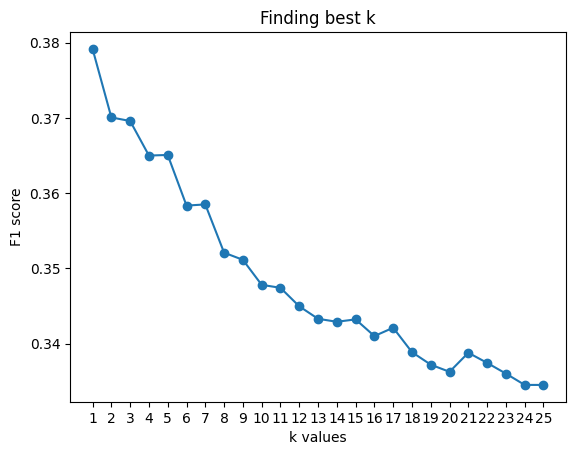

In [76]:
#print(scores)
plt.plot(range(1, 26), scores, marker = "o")
plt.title("Finding best k")
plt.xlabel("k values")
plt.ylabel("F1 score")
plt.xticks(range(1, 26))

In [80]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_Images, y_Labels)
y_pred = knn.predict(X_test)

print(classification_report(y_Labels_test, y_pred))

              precision    recall  f1-score   support

           0       0.21      0.28      0.24        60
           1       0.33      0.33      0.33       720
           2       0.28      0.26      0.27       750
           3       0.13      0.16      0.15       450
           4       0.30      0.36      0.33       660
           5       0.22      0.38      0.28       630
           6       0.63      0.46      0.53       150
           7       0.23      0.37      0.28       450
           8       0.29      0.34      0.31       450
           9       0.50      0.27      0.35       480
          10       0.51      0.63      0.56       660
          11       0.55      0.35      0.43       420
          12       0.59      0.49      0.53       690
          13       0.80      0.86      0.83       720
          14       0.77      0.25      0.38       270
          15       0.23      0.26      0.24       210
          16       0.67      0.82      0.74       150
          17       0.86    